Given a list of planets discovered by KEPLER.

Create an ML algorithm to classify the planets as Candidate/False positive/Confirmed etc based on the  column “koi_disposition”.


Project Workflow -

1. Importing required packages

2. Dataset Loading

3. Preparing the dataset by using certain processing techniques like  checking the statsitics of dataset, mapping categorical features into numeric, replacing the NAN values with mean data

4. Differentiating the features into training and testing data and loading into the models for Classification

5. Random Forest Classifier and Logistic Regression is used for classification purposes 

6. Test Evaluation metrics is checked like accuracy, classification report and confusion matrix for understanding how both the algorithms performs on the test data

7. Finally one bar graph is plotted for Accuracy score comparison which finally concludes the problem statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("/Users/soumobratamanna/Dropbox/Data_Science_Projects/tensorflow-test/Planets_Dataset_Classification.csv")

In [3]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.54,0.04,-0.18,0.87,0.23,-0.08,297.00,48.13,15.44
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.56,0.05,-0.17,0.79,0.20,-0.07,285.53,48.29,15.60
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.44,0.07,-0.21,1.05,0.33,-0.13,288.75,48.23,15.51


In [4]:
data.tail()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1442,10130039,K01909.02,Kepler-334 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-115.0,4.34,0.13,-0.10,1.10,0.17,-0.16,287.14,47.12,12.78
1443,9518318,K01978.01,Kepler-346 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1444,9518318,K01978.02,Kepler-346 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1445,7273277,K01979.01,Kepler-1035 b,CONFIRMED,CANDIDATE,0.998,0,0,0,0,...,-87.0,4.46,0.04,-0.12,0.99,0.15,-0.07,289.04,42.88,12.99
1446,11769890,K01980.01,Kepler-1036 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-107.0,4.51,0.05,-0.08,0.86,0.09,-0.05,295.18,49.95,13.80


In [5]:
data.isnull().sum()

kepid                  0
kepoi_name             0
kepler_name          641
koi_disposition        0
koi_pdisposition       0
koi_score             59
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1       21
koi_period_err2       21
koi_time0bk            0
koi_time0bk_err1      21
koi_time0bk_err2      21
koi_impact            18
koi_impact_err1       21
koi_impact_err2       21
koi_duration           0
koi_duration_err1     21
koi_duration_err2     21
koi_depth             18
koi_depth_err1        21
koi_depth_err2        21
koi_prad              18
koi_prad_err1         18
koi_prad_err2         18
koi_teq               18
koi_insol             17
koi_insol_err1        17
koi_insol_err2        17
koi_model_snr         18
koi_tce_plnt_num      51
koi_steff             18
koi_steff_err1        20
koi_steff_err2        24
koi_slogg             18
koi_slogg_err1        20
koi_slogg_err2        20


Replacing the Null values with thier respective mean data

In [6]:
df_filled = data.fillna(data.mean())

/var/folders/px/s9gf__z95vqfkz8lnyxs71w00000gn/T/ipykernel_1784/2083762864.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled = data.fillna(data.mean())


In [7]:
df_filled

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.54,0.04,-0.18,0.87,0.23,-0.08,297.00,48.13,15.44
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.56,0.05,-0.17,0.79,0.20,-0.07,285.53,48.29,15.60
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.44,0.07,-0.21,1.05,0.33,-0.13,288.75,48.23,15.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,10130039,K01909.02,Kepler-334 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-115.0,4.34,0.13,-0.10,1.10,0.17,-0.16,287.14,47.12,12.78
1443,9518318,K01978.01,Kepler-346 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1444,9518318,K01978.02,Kepler-346 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1445,7273277,K01979.01,Kepler-1035 b,CONFIRMED,CANDIDATE,0.998,0,0,0,0,...,-87.0,4.46,0.04,-0.12,0.99,0.15,-0.07,289.04,42.88,12.99


In [8]:
df_filled.isnull().sum()

kepid                  0
kepoi_name             0
kepler_name          641
koi_disposition        0
koi_pdisposition       0
koi_score              0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        0
koi_period_err2        0
koi_time0bk            0
koi_time0bk_err1       0
koi_time0bk_err2       0
koi_impact             0
koi_impact_err1        0
koi_impact_err2        0
koi_duration           0
koi_duration_err1      0
koi_duration_err2      0
koi_depth              0
koi_depth_err1         0
koi_depth_err2         0
koi_prad               0
koi_prad_err1          0
koi_prad_err2          0
koi_teq                0
koi_insol              0
koi_insol_err1         0
koi_insol_err2         0
koi_model_snr          0
koi_tce_plnt_num       0
koi_steff              0
koi_steff_err1         0
koi_steff_err2         0
koi_slogg              0
koi_slogg_err1         0
koi_slogg_err2         0


In [9]:
df_filled.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,1.447000e+03,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,7.700873e+06,0.696638,0.023497,0.199724,0.161023,0.098825,119.361175,0.000049,-0.000049,170.868127,...,-143.895994,4.406256,0.089846,-0.123301,1.271819,0.247001,-0.231184,292.114610,43.837865,14.623898
std,2.711469e+06,0.435988,0.151528,0.399931,0.367679,0.298530,3418.120272,0.000787,0.000787,65.505885,...,65.447183,0.315693,0.088611,0.073877,3.815287,0.807914,1.270791,4.699161,3.647025,1.210683
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000,0.000000,-0.020000,120.570000,...,-1005.000000,0.650000,0.000000,-0.750000,0.120000,0.000000,-33.660000,280.360000,36.580000,6.970000
25%,5.559550e+06,0.000000,0.000000,0.000000,0.000000,0.000000,3.720000,0.000000,0.000000,134.475000,...,-179.000000,4.340000,0.040000,-0.180000,0.810000,0.080000,-0.150000,288.790000,40.765000,13.960000
50%,7.939330e+06,0.997000,0.000000,0.000000,0.000000,0.000000,8.510000,0.000000,0.000000,142.190000,...,-142.000000,4.470000,0.060000,-0.110000,0.930000,0.190000,-0.090000,292.470000,43.730000,15.040000
75%,9.897461e+06,1.000000,0.000000,0.000000,0.000000,0.000000,21.040000,0.000000,0.000000,173.550000,...,-90.000000,4.560000,0.120000,-0.060000,1.155000,0.280000,-0.060000,295.895000,46.750000,15.470000
max,1.264482e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.780000,0.020000,0.000000,524.280000,...,0.000000,5.280000,0.920000,0.000000,101.450000,20.710000,0.000000,301.480000,51.760000,17.450000


In [10]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              1447 non-null   int64  
 1   kepoi_name         1447 non-null   object 
 2   kepler_name        806 non-null    object 
 3   koi_disposition    1447 non-null   object 
 4   koi_pdisposition   1447 non-null   object 
 5   koi_score          1447 non-null   float64
 6   koi_fpflag_nt      1447 non-null   int64  
 7   koi_fpflag_ss      1447 non-null   int64  
 8   koi_fpflag_co      1447 non-null   int64  
 9   koi_fpflag_ec      1447 non-null   int64  
 10  koi_period         1447 non-null   float64
 11  koi_period_err1    1447 non-null   float64
 12  koi_period_err2    1447 non-null   float64
 13  koi_time0bk        1447 non-null   float64
 14  koi_time0bk_err1   1447 non-null   float64
 15  koi_time0bk_err2   1447 non-null   float64
 16  koi_impact         1447 

In [11]:
df_filled["koi_disposition"].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

Encoding the Categorical data

In [12]:
df_filled.replace({'koi_disposition' : {'CONFIRMED':1,'CANDIDATE':2,'FALSE POSITIVE':0}},inplace=True)

In [13]:
df_filled["koi_disposition"].unique()

array([1, 2, 0])

Dropping some categorical features which are not not having any connections or correlations for the classification purposes 

In [14]:
df_filled = df_filled.drop(["kepoi_name","kepler_name","koi_pdisposition"],axis=1)

In [15]:
df_filled

,kepid,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,1,1.000,0,0,0,0,9.49,0.0,0.0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
1,10797460,1,0.969,0,0,0,0,54.42,0.0,0.0,...,-81.0,4.47,0.06,-0.10,0.93,0.11,-0.06,291.93,48.14,15.35
2,10811496,2,0.000,0,0,0,0,19.90,0.0,0.0,...,-176.0,4.54,0.04,-0.18,0.87,0.23,-0.08,297.00,48.13,15.44
3,10848459,0,0.000,0,1,0,0,1.74,0.0,0.0,...,-174.0,4.56,0.05,-0.17,0.79,0.20,-0.07,285.53,48.29,15.60
4,10854555,1,1.000,0,0,0,0,2.53,0.0,0.0,...,-211.0,4.44,0.07,-0.21,1.05,0.33,-0.13,288.75,48.23,15.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,10130039,1,1.000,0,0,0,0,5.47,0.0,0.0,...,-115.0,4.34,0.13,-0.10,1.10,0.17,-0.16,287.14,47.12,12.78
1443,9518318,1,1.000,0,0,0,0,6.51,0.0,0.0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1444,9518318,1,1.000,0,0,0,0,23.85,0.0,0.0,...,-232.0,4.47,0.06,-0.21,1.00,0.33,-0.11,288.01,46.12,15.21
1445,7273277,1,0.998,0,0,0,0,2.71,0.0,0.0,...,-87.0,4.46,0.04,-0.12,0.99,0.15,-0.07,289.04,42.88,12.99


# Random Forest Classifier Algorithms Implemtation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [17]:
model = RandomForestClassifier()

Selecting the Independent and the Dependent Variables before loading into the models for Classification and GridSearchCV Tunning method is used for increasing the model accuracy

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV 

X = df_filled.drop("koi_disposition", axis=1)
Y = df_filled["koi_disposition"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_clf_model, param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Printing the best parameters being chosen by the model

In [33]:
best_params = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)

Model Evaluation

In [45]:

accuracy_rf = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_rf)


print("Classification Report:")
print(classification_report(Y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.8655172413793103
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        81
           1       0.87      0.96      0.91       167
           2       0.61      0.26      0.37        42

    accuracy                           0.87       290
   macro avg       0.80      0.73      0.74       290
weighted avg       0.84      0.87      0.84       290

Confusion Matrix:
[[ 79   0   2]
 [  1 161   5]
 [  7  24  11]]


# Logistic Regression Algorithms Implementation

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


In [47]:
X = df_filled.drop("koi_disposition", axis=1)
y = df_filled["koi_disposition"]

Here also , GridSearchCV tunning method is used to increase the model accuracy

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

model_lr = LogisticRegression()




In [49]:
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train, Y_train)


/Users/soumobratamanna/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/soumobratamanna/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Best parameters which are selected by the model being printed

In [50]:
best_params = grid_search_lr.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


In [51]:
best_model = grid_search_lr.best_estimator_
y_prediction = best_model.predict(X_test)


Model Evaluation

In [52]:
accuracy_lr = accuracy_score(Y_test, y_prediction)
print("Accuracy:", accuracy_lr)


print("Classification Report:")
print(classification_report(Y_test, y_prediction))


print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_prediction))

Accuracy: 0.6896551724137931
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        81
           1       0.70      0.93      0.79       167
           2       0.00      0.00      0.00        42

    accuracy                           0.69       290
   macro avg       0.46      0.49      0.47       290
weighted avg       0.59      0.69      0.63       290

Confusion Matrix:
[[ 45  36   0]
 [ 12 155   0]
 [ 10  32   0]]


/Users/soumobratamanna/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/soumobratamanna/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/soumobratamanna/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Data Visualization on Accuracy Scores , comparing both the Algorithms 

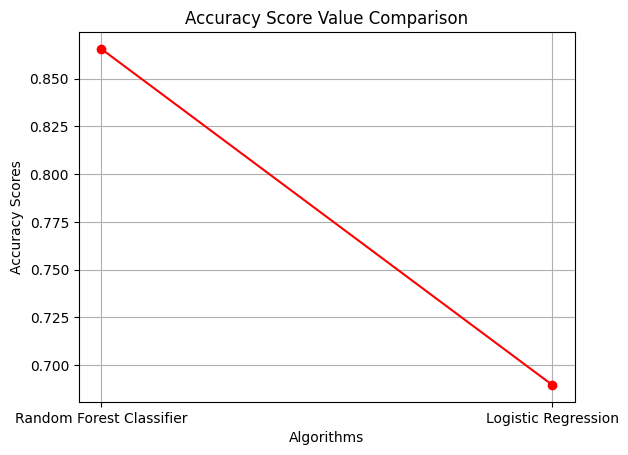

In [53]:
algorithms=["Random Forest Classifier", "Logistic Regression"]
accuracy_scores=[accuracy_rf,accuracy_lr]
plt.plot(algorithms,accuracy_scores, marker = 'o',color='red')
plt.grid()
plt.title("Accuracy Score Value Comparison") 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Scores")
plt.show()

From the above Comparison Graph it is observed that Random Forest Classifier outperform Logistic Regression for classification problems for several reasons:

>Handling Nonlinear Relationships:Random Forest is capable of capturing nonlinear relationships between features and target variables. It constructs multiple decision trees and combines their predictions, allowing it to model complex decision boundaries. In contrast, Logistic Regression assumes linear relationships between features and the log-odds of the target variable, which may limit its ability to capture nonlinear patterns in the data.

>Robustness to Outliers and Irrelevant Features:Random Forest is less sensitive to outliers and irrelevant features compared to Logistic Regression. Since it averages predictions from multiple decision trees, outliers and noise in the data have less impact on the final result. Logistic Regression, on the other hand, may be influenced by outliers and may assign undue importance to irrelevant features.

> Feature Importance:Random Forest provides a measure of feature importance, indicating which features contribute most to the classification task. This information can be valuable for feature selection and interpretation. Logistic Regression, while interpretable, does not inherently provide feature importance measures.

> Ensemble Learning:Random Forest is an ensemble learning method, combining multiple decision trees to improve predictive performance. Each decision tree is trained independently on a subset of the data, and their predictions are aggregated to make final predictions. This ensemble approach helps reduce overfitting and variance, leading to better generalization performance compared to Logistic Regression, especially when the dataset is complex or high-dimensional.

> Handling Imbalanced Data: Random Forest can handle imbalanced datasets more effectively than Logistic Regression. By randomly sampling from the majority and minority classes during the construction of each decision tree, Random Forest can mitigate the impact of class imbalance. Logistic Regression, while possible to use with imbalanced data, may require additional techniques such as class weighting or resampling to address class imbalance effectively.


# Business Questions 

Sub-questions for Problem 2
1. Why did you choose the particular algorithm?
2. What are the different tuning methods used for the algorithm?
3. Did you consider any other choice of algorithm?Why or why not?
4. What is the accuracy?
5. What are the different types of metrics that can be used to evaluate the model?



1. Why did you choose the particular algorithm?
> Random Forest Classifier algorithm is implemented as the first choice of algorithm because it has higher accuracy as compared to other classification algorithms, non-linear relationships, it's robustness to overfitting, feature importance, handling imbalanced dataset

2. What are the different tuning methods used for the algorithm?
> GridSearchCV Tuning method is used on both the algorithms with some hyperparameters testing and printed the best parameters being chosen by the model with the values

3. Did you consider any other choice of algorithm?Why or why not?
> Yes, Logistic Regression Algorithms is used for classification purposes but the accuracy score is better for Random Forest Classifier algorithm due to multiple reasons mentioned above after graph implementation

>Even planned of using Naive Bayes Algorithms but it has no tunning methods , its a pretty generalized model

4. What is the accuracy?
> Random Forest Classifier - 0.86

> Logistic Regression - 0.68


5. What are the different types of metrics that can be used to evaluate the model?
> Metrics used are Accuracy, Confusion matrix and Classification Report for evaluation metrics